The optimal max_depth is 2
Accuracy of entropy is 0.94


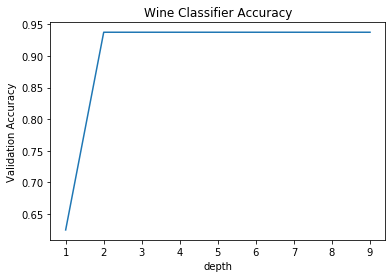

Accuracy: 0.94


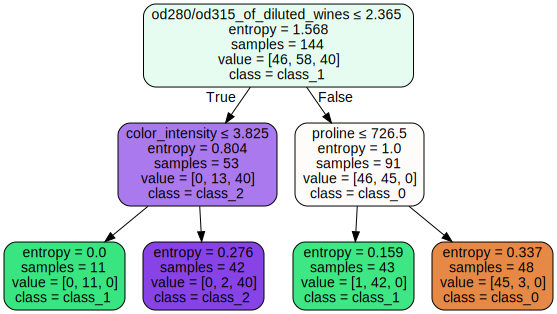

In [11]:
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap, colorConverter, LinearSegmentedColormap
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_wine
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn import tree

import graphviz

wine = load_wine()

x_train, x_test, y_train, y_test = train_test_split(wine.data, wine.target, test_size = 0.1, random_state = 0)
x_train, x_val, y_train, y_val = train_test_split(x_train, y_train, test_size=0.1, random_state = 0)

depth_list = range(1,10)
accuracies = []
accuracy = 0

for depth in depth_list:
    tree_clf = DecisionTreeClassifier(criterion='entropy', max_depth=depth, random_state=0) # criterion='entropy' vs 'gini'
    tree_clf.fit(x_train, y_train)
    accuracies.append(tree_clf.score(x_val, y_val))
    y_pred_tr = tree_clf.predict(x_val)
    if(accuracy < accuracy_score(y_val, y_pred_tr)):
        accuracy = accuracy_score(y_val, y_pred_tr)
        optimal_depth = depth
    
# determining best depth
optimal_depth = depth_list[accuracies.index(max(accuracies))]
print("The optimal max_depth is {}".format(optimal_depth))
print('Accuracy of entropy is %.2f' % accuracy)

# plot accuracy
plt.plot(depth_list, accuracies)
plt.xlabel("depth")
plt.ylabel("Validation Accuracy")
plt.title("Wine Classifier Accuracy")
plt.show()

wine_tree = DecisionTreeClassifier(criterion='entropy', max_depth=optimal_depth, random_state=0) # criterion='entropy' vs 'gini'
wine_tree.fit(x_train, y_train)

y_pred_tr = wine_tree.predict(x_val)
print('Accuracy: %.2f' % accuracy_score(y_val, y_pred_tr))
 
dot_data = tree.export_graphviz(wine_tree, out_file=None)
graph = graphviz.Source(dot_data)
graph.render("wine")

dot_data = tree.export_graphviz(wine_tree, out_file=None, 
                      feature_names=wine.feature_names,  
                      class_names=wine.target_names,  
                      filled=True, rounded=True,  
                      special_characters=True)  
graph = graphviz.Source(dot_data)  
graph 

The optimal max_depth is 2
Accuracy of gini is 0.88


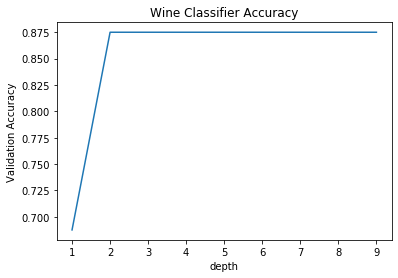

Accuracy: 0.88


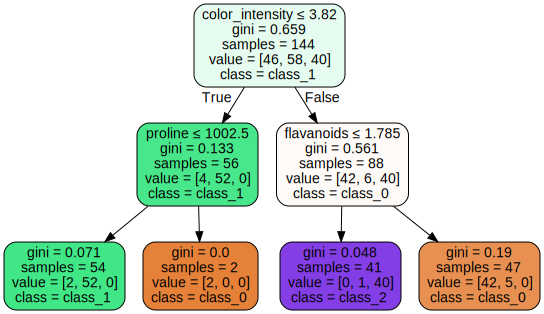

In [9]:
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap, colorConverter, LinearSegmentedColormap
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_wine
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn import tree

import graphviz

wine = load_wine()

x_train, x_test, y_train, y_test = train_test_split(wine.data, wine.target, test_size = 0.1, random_state = 0)
x_train, x_val, y_train, y_val = train_test_split(x_train, y_train, test_size=0.1, random_state = 0)

depth_list = range(1,10)
accuracies = []
accuracy = 0

for depth in depth_list:
    tree_clf = DecisionTreeClassifier(criterion='gini', max_depth=depth, random_state=0) # criterion='entropy' vs 'gini'
    tree_clf.fit(x_train, y_train)
    accuracies.append(tree_clf.score(x_val, y_val))
    y_pred_tr = tree_clf.predict(x_val)
    if(accuracy < accuracy_score(y_val, y_pred_tr)):
        accuracy = accuracy_score(y_val, y_pred_tr)
        optimal_depth = depth # optimal_depth
        
optimal_depth = depth_list[accuracies.index(max(accuracies))]
print("The optimal max_depth is {}".format(optimal_depth))
print('Accuracy of gini is %.2f' % accuracy)

plt.plot(depth_list, accuracies)
plt.xlabel("depth")
plt.ylabel("Validation Accuracy")
plt.title("Wine Classifier Accuracy")
plt.show()

wine_tree = DecisionTreeClassifier(criterion='gini', max_depth=optimal_depth, random_state=0) # criterion='entropy' vs 'gini'
wine_tree.fit(x_train, y_train)

y_pred_tr = wine_tree.predict(x_val)
print('Accuracy: %.2f' % accuracy_score(y_val, y_pred_tr))
 
dot_data = tree.export_graphviz(wine_tree, out_file=None)
graph = graphviz.Source(dot_data)
graph.render("wine")

dot_data = tree.export_graphviz(wine_tree, out_file=None, 
                      feature_names=wine.feature_names,  
                      class_names=wine.target_names,  
                      filled=True, rounded=True,  
                      special_characters=True)  
graph = graphviz.Source(dot_data)  
graph 

Accuracy of entropy is 0.94


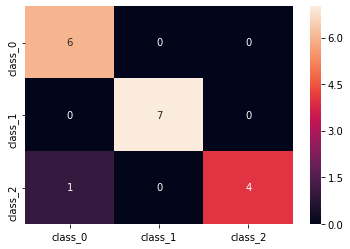

In [12]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap, colorConverter, LinearSegmentedColormap
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_wine
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix

from sklearn.tree import DecisionTreeClassifier

wine = load_wine()
x_train, x_test, y_train, y_test = train_test_split(wine.data, wine.target, test_size = 0.1, random_state = 0)

# criterion = 'entropy'(optimal max_depth = 2)
tree_ent = DecisionTreeClassifier(criterion='entropy', max_depth=2, random_state=0) # criterion='entropy' vs 'gini'
tree_ent.fit(x_train, y_train)
y_pred1 = tree_ent.predict(x_test)
print('Accuracy of entropy is %.2f' % accuracy_score(y_pred1, y_test))

cm = pd.DataFrame(confusion_matrix(y_test, y_pred1), columns=wine.target_names, index=wine.target_names)
heat_wine = sns.heatmap(cm, annot=True)

buttom, top = heat_wine.get_ylim()
heat_wine.set_ylim(buttom+0.5, top-0.5)
plt.show()